# Task-2 To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear regression task as it involves just two variables.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing Data

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#There are 25 rows and 2 columns.
#Mean hour is 5 and mean score is 51.48.
#Third Quartile and max value is more close implies there are no outliers.

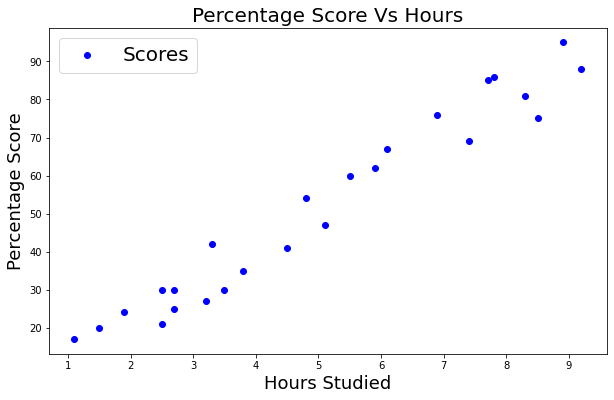

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(x='Hours',y='Scores',data=data,color='blue');
plt.title('Percentage Score Vs Hours',fontsize=20)
plt.xlabel('Hours Studied',fontsize=18)
plt.ylabel('Percentage Score',fontsize=18)
plt.legend(fontsize=20);

There is a positive linear relationship between the number of hours studied and percentage scored.

In [7]:
x= data['Hours'].values.reshape(-1,1)
y= data['Scores'].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=120)

In [9]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print('The coefficient of the regression line:', reg_model.coef_)
print('The intercept of the regression line:', reg_model.intercept_)

The coefficient of the regression line: [9.89807788]
The intercept of the regression line: 2.5788204111208586


In [11]:
y_pred=reg_model.predict(x_test)
print(y_pred)

[40.19151634 86.71248236 70.87555776 84.73286679 62.95709546 34.25266962
 60.97747988]


Actual Vs Predicted Values

In [12]:
df=pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})
df

,Actual Values,Predicted Values
0,35,40.191516
1,75,86.712482
2,76,70.875558
3,81,84.732867
4,67,62.957095
5,27,34.252670
6,62,60.977480


Plot the best fit regression line

In [13]:
reg_line = (reg_model.coef_*x) + reg_model.intercept_
reg_line

array([[27.3240151 ],
       [53.05901758],
       [34.25266962],
       [86.71248236],
       [37.22209298],
       [17.42593723],
       [93.64113688],
       [57.01824873],
       [84.73286679],
       [29.30363068],
       [78.79402006],
       [60.97747988],
       [47.12017086],
       [35.2424774 ],
       [13.46670608],
       [90.67171351],
       [27.3240151 ],
       [21.38516838],
       [62.95709546],
       [75.8245967 ],
       [29.30363068],
       [50.08959422],
       [40.19151634],
       [70.87555776],
       [79.78382785]])

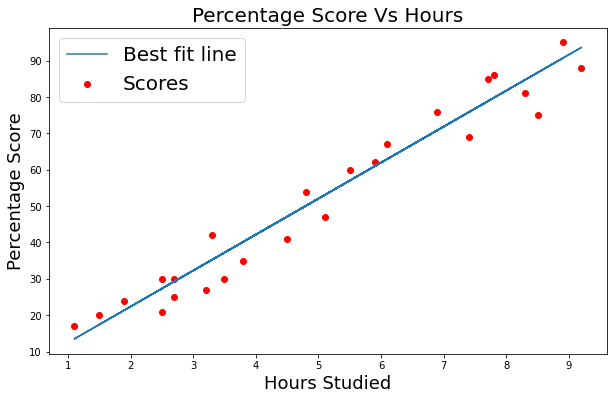

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x='Hours',y='Scores',data=data,color='Red');
plt.plot(x,reg_line,label='Best fit line')
plt.title('Percentage Score Vs Hours', fontsize=20)
plt.xlabel('Hours Studied',fontsize=18)
plt.ylabel('Percentage Score',fontsize=18)
plt.legend(fontsize=20);


Predicted Score

In [15]:
No_of_hours=9.25

In [16]:
prediction=reg_model.predict([[No_of_hours]])

In [17]:
print('Number of hours studied:',No_of_hours)
print('Predicted Score:',prediction[0])

Number of hours studied: 9.25
Predicted Score: 94.1360407688494


If a student studies for 9.25 hours, He or She will score 93.02%